In [3]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


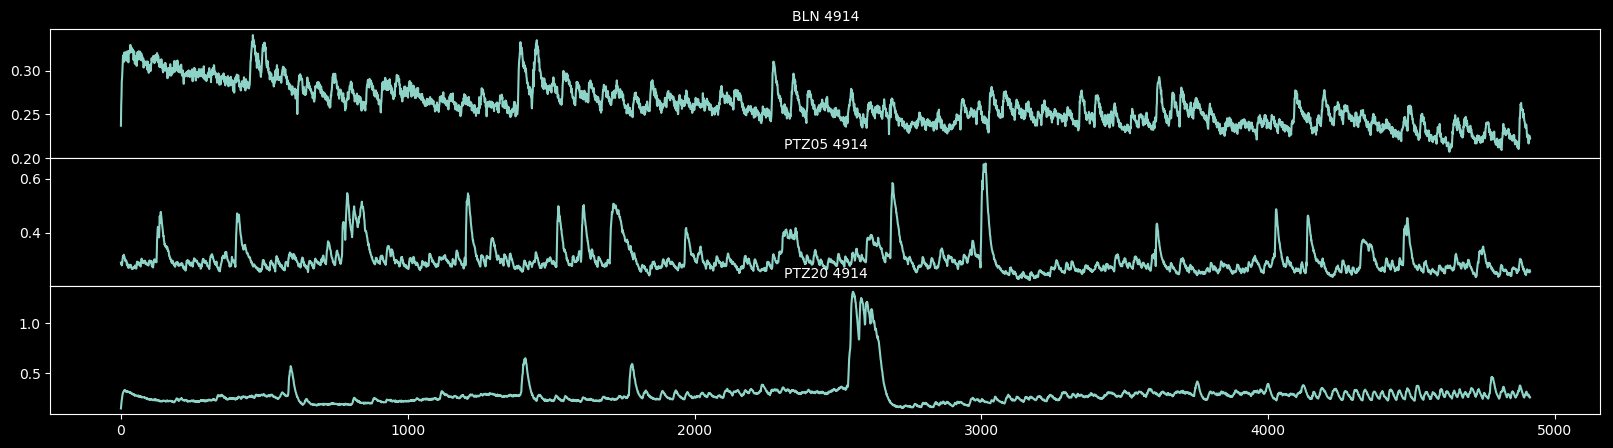

In [7]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
deltalist = sorted(glob.glob('*E-02*_deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(np.load(deltalist[i]).shape[1]), size = 10)
    axarr[i].plot(np.apply_along_axis(np.mean, 0, np.load(deltalist[i])))
plt.show()

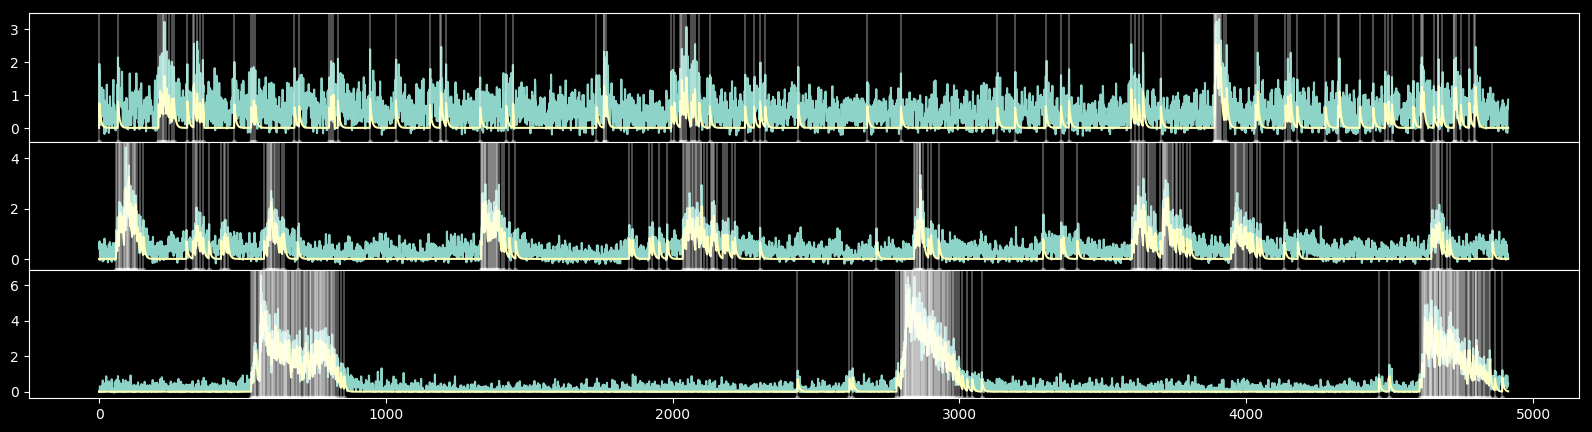

In [10]:
# PLOT - average whole brain fluorescence
#----------------------------------------
fnum, cell = ['12', 6]
dfflist = sorted(glob.glob('*E-' + fnum + '*cutdeltaff*'))
binlist = sorted(glob.glob('*E-' + fnum + '*cutbinarised.npy')) 
modelist = sorted(glob.glob('*E-' + fnum + '*cutmodelcal.npy')) 
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(binlist)):
    axarr[i].plot(np.load(dfflist[i])[cell])
    axarr[i].plot(np.load(modelist[i])[cell])
    for x in np.where(np.load(binlist[i])[cell] == 1)[0]: axarr[i].axvline(x=x, marker = '.', alpha = 0.3, ymin = 0, ymax = 60)
plt.show()

## Reshape all data into the same length

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
baselist = sorted(glob.glob('*_baseline.npy'))
deltalist = sorted(glob.glob('*_deltaff.npy'))
modellist = sorted(glob.glob('*_modelcal.npy'))
reallist = sorted(glob.glob('*_realtrace.npy'))
bindlist = sorted(glob.glob('*_binarised.npy')) #list - binarised trace

In [343]:
#cut in half trace (BLN - first half, PTZ05, PTZ20 - second half) 
#--------------------------------
def load(delta, model, real, base): #bind
    valist = (delta, model, real, base) #bind
    return valist
def cut(Fdrop, experiment, name, valist, amount):
    namelist = ['cutdeltaff', 'cutmodelcal', 'cutrealtrace', 'cutbaseline']
    for e in range(len(namelist)):
        np.save(Fdrop + 'Project/' + experiment + os.sep + name[:name.find('run')+7] + namelist[e] + '.npy', eval('valist[e]' + amount))    

for i in range(len(deltalist)):
    name = deltalist[i]
    valist  = load(np.load(deltalist[i]), np.load(modellist[i]), np.load(reallist[i]), np.load(baselist[i]))
    if valist[0].shape[1] == 4914:
        cut(Fdrop, experiment, name, valist, amount = '') 
    else:
        if 'BLN' in name:
            cut(Fdrop, experiment, name, valist, amount = '[:,:4914]') 
        else:
            cut(Fdrop, experiment, name, valist, amount = '[:,4914:]') 

## Label seizure events

* Define ptz20mm seizure events

* Show that you can decode 20mM PTZ events


# Temporal organisation of avalanches

* look at avalanche frequency before, during and after

* inter-avalanche interval across conditions (in seizure preceding events) 


In [11]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
num = '02'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*E-' + num + '*cutbinarised.npy'))
nnblist = sorted(glob.glob('*E-' + num + '*_nnb.npy')) 
pkglist =  sorted(glob.glob('*E-' + num +'*pkg*')) 
avlist =  sorted(glob.glob('*E-' + num + '*av*'))

In [12]:
bln = np.load(pkglist[0])
p20 = np.load(pkglist[2])

In [227]:
#Create time series plot for different avalanches
import scipy.sparse as sp
pkg = p20
pkgs = sp.csr_matrix(p20)
mark = np.unique(pkg, return_counts=True)[0][np.unique(pkg, return_counts=True)[1] > 5][1:] #avalanches with more than 3 cells (can be 3 cells in one time frame, or 3 time frames one cell)
avtime = list(range(mark.shape[0])) #list - each element = 2xarray - 1d: number of cells, 2d: frame number

for t in range(mark.shape[0]):
    avt = np.unique(sp.find(pkgs == mark[t])[1]) #unique time points
    avary = np.zeros((2, len(avt))) #2xarray - 1d: number of cells, 2d: frame number
    count = 0
    for e in avt:
        findmark = pkgs == mark[t]
        avary[0,count] = len(sp.find(findmark)[0][np.where(sp.find(findmark)[1] == e)])
        avary[1,count] = e
        count+=1
    avtime[t] = avary #avtime list is ordered from lowest avalanche number to highest (REMEMBER ONLY TAKING AVALANCHES WITH MORE THAN 2 CELLS)


# Spatial organisation of avalanches

* avalanche propagation comparison
* Colour code avalanches by size and show how size changes with seizures 
* Demonstrate the pattern of propagation before seizures? And pattern during and after
* Key regions for avalanche initiation 
* Propagation direction
* Key propagation regions (register fish)
* How does functional connectivity constrain avalanche propagation? 
* Heat map 
* Demonstrate closed cycles that precede avalanches? 
* average across fish

In [272]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
num = '02'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*E-' + num + '*cutbinarised.npy'))
nnblist = sorted(glob.glob('*E-' + num + '*_nnb.npy')) 
pkglist =  sorted(glob.glob('*E-' + num +'*pkg*')) 
avlist =  sorted(glob.glob('*E-' + num + '*av*'))

In [ ]:
#PLOT AVALANCHEs
#--------------
avnum = 37
coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)
dotplot = plt.scatter(coordz[avcoord[avnum]][:,0], coordz[avcoord[avnum]][:,1], s=80, c = 'r', alpha = 1)
fig.gca().set_aspect('equal', adjustable='box')

os.chdir(Ffig)
plt.savefig('av11.png', transparent = True)

In [ ]:
#ANIMATION
#-------------------------------
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(10,10))
plt.xlim(0, 300)
plt.ylim(0, 300)

def animate(i):
    #select data range
    p = plt.scatter(x=c [:,0], y=c [:,1], c=DFF[:,i],vmin =0.01, vmax = 0.2)
    return(p)
   
ani = animation.FuncAnimation(fig, animate, frames=10, repeat=False)
HTML(ani.to_html5_video())